### Reducyin feateru space via prine thos how dont have eanf influance

###### Notice:

Increasing the number of values to measure (parameter) increases the importance of this value. Increasing the random values from 6 to 666 increased the importance from 10% to 35% respectively. This value even more than `x` and `y`. You need to do grouping and use the algorithm on groups

- Use random column for identification of valid results. If feature importance is lower than random - than its to noisy 
- Manipulation with weights oft is not good idee.

In [1]:
import pygmo as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tools import plot_mo, pro_fitness, heat_map, surface_plot

In [2]:
# --- Problem
DIM = 12
udp = pg.zdt(prob_id=4, param=DIM)
pro = pg.problem(udp)

pop = pg.population(pro, size=1000, seed = 34412)

fitness = pd.DataFrame(pop.get_x(), columns=['x{}'.format(i+1) for i in range(DIM)])
results = pd.DataFrame(pop.get_f(), columns=['f{}'.format(i+1) for i in range(2)])
fitness = fitness.join(results)

fitness['rand5'] = np.random.randint(1, 5, fitness.shape[0])
fitness['rand250'] = np.random.randint(1, 250, fitness.shape[0])
fitness['rand1k'] = np.random.randint(1, 1000, fitness.shape[0])

# fitness


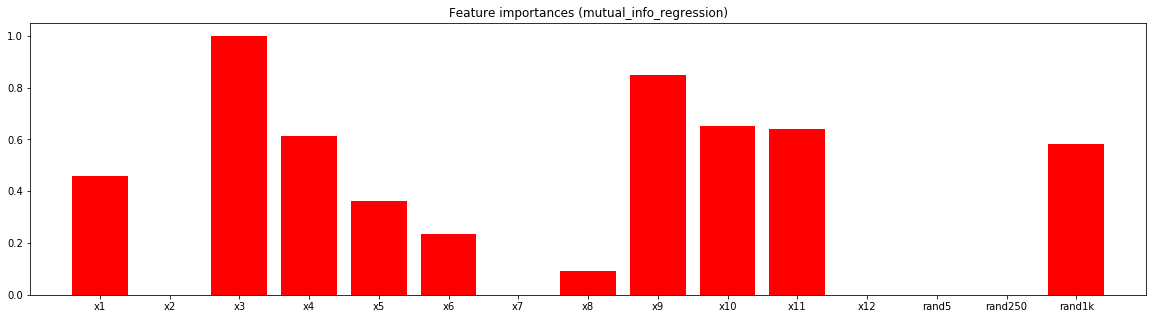

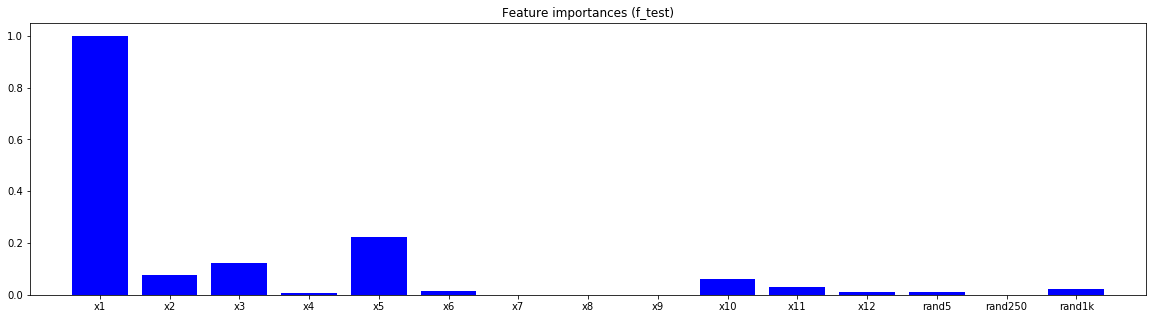

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression, mutual_info_regression, GenericUnivariateSelect, SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = fitness.drop(['f1', 'f2'], axis = 1)
y = fitness['f2']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# =================================== Mutual information regression
mut_info = mutual_info_regression(X_train, y_train)
mut_info /= np.max(mut_info)

plt.figure(figsize=(20,5))
plt.title("Feature importances (mutual_info_regression)")
plt.bar(range(X_train.shape[1]), mut_info, color="r")
plt.xticks(range(X_train.shape[1]), X_train.columns)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# =================================== F1 information

f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

plt.figure(figsize=(20,5))
plt.title("Feature importances (f_test)")
plt.bar(range(X_train.shape[1]), f_test, color="b")
plt.xticks(range(X_train.shape[1]), X_train.columns)
plt.xlim([-1, X_train.shape[1]])
plt.show()

> Use importance from the "random" column as coeficient of validacy of feature selection

In [4]:
transformer = GenericUnivariateSelect(mutual_info_regression, 'percentile', param=50)
X_new = transformer.fit_transform(X, y)

X[X.columns[transformer.get_support(indices=True)]]


,x1,x3,x6,x8,x9,x10,x11
0,0.901404,2.038049,-4.232494,-1.082451,-2.229464,3.673872,-0.823615
1,0.199994,-1.918556,3.591914,-2.542185,-2.790382,2.019155,0.836735
2,0.180037,-2.931583,1.427565,0.596423,-0.554357,-3.057489,-3.789297
3,0.692165,1.653520,2.684208,-1.316904,4.803630,-4.722307,-2.071613
4,0.726992,-3.753966,-2.995013,2.048289,-0.521693,-2.058275,-2.823200
...,...,...,...,...,...,...,...
995,0.137442,0.944775,1.901395,-3.179977,-0.746086,0.576144,2.575907
996,0.118448,2.676917,-3.014364,-3.228350,-4.501474,-0.309650,1.192521
997,0.546327,0.913457,2.799821,-3.481218,-0.499167,-0.241046,-3.951693
998,0.820259,-0.214697,-4.221593,-2.311415,-2.432243,-4.364764,4.607006


In [5]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_selection import VarianceThreshold

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

pca = PCA()
X_pca = pca.fit_transform(X)

# pd.DataFrame(X_pca)

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

variance_threshold_selector(X)

# Variance threshold maybe not suitable


,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,rand5,rand250,rand1k
0,-3.990507,2.038049,-0.719127,-3.924201,-4.232494,4.899200,-1.082451,-2.229464,3.673872,-0.823615,3.405474,4,164,340
1,1.820427,-1.918556,2.879490,3.225387,3.591914,1.734116,-2.542185,-2.790382,2.019155,0.836735,4.884428,4,128,677
2,2.604351,-2.931583,-4.308553,0.312203,1.427565,1.512585,0.596423,-0.554357,-3.057489,-3.789297,-3.147167,4,138,462
3,0.854041,1.653520,-1.557625,4.201521,2.684208,-2.957636,-1.316904,4.803630,-4.722307,-2.071613,3.124108,3,129,185
4,-3.303818,-3.753966,-3.881264,3.260666,-2.995013,-3.314666,2.048289,-0.521693,-2.058275,-2.823200,3.806180,3,101,953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.638837,0.944775,1.218078,4.783893,1.901395,-0.615801,-3.179977,-0.746086,0.576144,2.575907,4.878345,1,99,610
996,-0.035461,2.676917,2.341353,-3.531724,-3.014364,0.962998,-3.228350,-4.501474,-0.309650,1.192521,-1.409390,1,103,344
997,-0.503829,0.913457,-2.081122,3.453738,2.799821,-0.065666,-3.481218,-0.499167,-0.241046,-3.951693,0.434054,1,37,270
998,3.859945,-0.214697,3.534389,-1.893335,-4.221593,0.355296,-2.311415,-2.432243,-4.364764,4.607006,-0.854340,4,108,208


In [6]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
# Kernel with parameters given in GPML book
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.19**2)  # noise terms
kernel_gpml = k1 + k2 + k3 + k4
baesian = gp.GaussianProcessRegressor(kernel=kernel_gpml,
                                    alpha=0,
                                    n_restarts_optimizer=10,
                                    normalize_y=True)

tree = DecisionTreeRegressor(max_depth = 3, random_state= 17)
tree.fit(X,y)

SelectFromModel(tree, prefit=True).transform(X)


# --------------------------------------------------------- Pipeline
feature_selection = GenericUnivariateSelect(mutual_info_regression, 'percentile', param=60)

clf = Pipeline([
  ('feature_selection', feature_selection),
  ('classification', baesian)
])
clf.fit(X_train, y_train)
print("Pipe:{}".format(clf.score(X_test, y_test)))


row = gp.GaussianProcessRegressor(kernel=kernel_gpml,
                                    alpha=0,
                                    n_restarts_optimizer=10,
                                    normalize_y=True)
row.fit(X_train, y_train)
print("Row:{}".format(row.score(X_test, y_test)))

Pipe:-0.00011978526070266506
Row:-0.0014224491194532172


In [7]:

row2 = gp.GaussianProcessRegressor(kernel=kernel_gpml,
                                    alpha=0,
                                    n_restarts_optimizer=10,
                                    normalize_y=True)
row2.fit(X_train[['x1','x2','x3','x4','x5']], y_train)
print("Model simple:{}".format(row2.score(X_test[['x1','x2','x3','x4','x5']], y_test)))

Model simple:0.12400248659076607


In [8]:
4-4

0